In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./../data/creditCard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244590,152411.0,-1.890709,-0.542282,1.667232,-1.320075,1.896798,-1.653879,0.298405,0.036790,-0.497838,...,-0.301269,-1.558487,0.292543,1.030685,0.278438,-0.093576,-0.135866,0.083364,32.32,0
121596,76251.0,-0.416812,1.094788,1.407763,0.090432,0.088453,-0.702471,0.649745,0.031906,-0.456319,...,-0.210692,-0.496087,0.055445,0.355370,-0.268145,0.080570,0.263522,0.098984,3.58,0
180166,124410.0,-0.299795,1.189940,-0.275855,-0.883849,1.846593,0.295136,1.317491,-0.331966,0.169723,...,-0.103828,0.484506,-0.467537,-0.249234,-0.057165,0.531048,0.160498,-0.133146,1.00,0
126911,78143.0,1.092016,-0.248751,0.479123,0.698631,-0.552619,-0.130127,-0.204164,0.104859,0.413320,...,-0.243844,-0.740164,-0.016861,0.007168,0.302426,0.180246,-0.035839,0.011819,63.95,0
199875,133174.0,-0.580941,-0.375186,1.567360,1.344814,0.077047,-0.263949,-0.110205,-0.199351,0.596305,...,0.264765,1.402928,0.368902,0.027529,-0.470200,0.231674,0.065245,-0.068620,18.96,0


<Axes: xlabel='Class'>

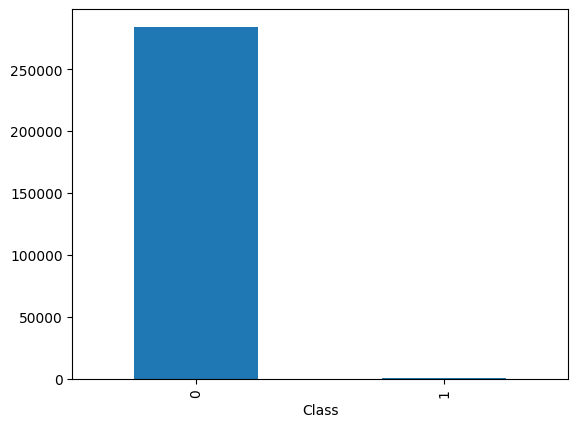

In [9]:
counts = df.value_counts('Class')
counts.plot(kind='bar')

<Axes: >

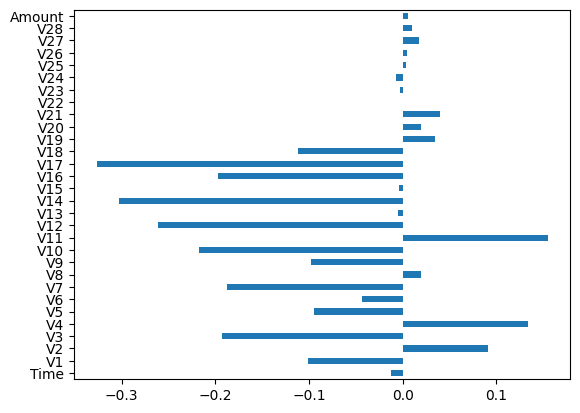

In [13]:
correlations = df.corr()['Class']
correlations.drop(['Class']).plot(kind='barh')

In [14]:
X = df.drop(['Class'], axis=1).values
y = df['Class'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

# stadardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, stratify=y, test_size=0.3, random_state=0)

In [ ]:
# good for high dimensional data
from sklearn.svm import LinearSVC

model = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
model.fit(X_train, y_train)

/Users/user/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('AUC: %.2f' % roc_auc_score(y_test, y_pred))


Accuracy: 1.00
AUC: 0.88
